In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [87]:
def positive_feedback(t, y, rate_constants):
    """Simulate enzymatic reaction cycle.

    In this case, substrate 1 (S1) becomes the product 1 (P1) and
    substrate 2 (S2)
    """
    s, c1, e1, p1, c2, e2, p2 = y
    k1, k2, k11, k4, k3, k33 = rate_constants
    
    if (1 <= t <= 1.5): # or (10 <= t <= 15):
        substrate_input = 0.2
    else:
        substrate_input = 0
    # Substrate 1
    ds_dt = -k1 * s * e1 + k11 * c1 + substrate_input
    # Complex 1
    dc1_dt = k1 * s * e1 - (k11 + k2) * c1
    # Enzyme 1
    de1_dt = -k1 * s * e1 + k2*c1
    # Product 1 / Substrate 2
    dp1_dt = k2 * c1 + k33 * c2 - k3 * p1 * e2
    # Complex 2
    dc2_dt = k3 * p1 * e2 - (k33 + k4) * c2
    # Enzyme 2
    de2_dt = -k3 * p1 * e2 + (k33 + k4) * c2
    # Product 2
    dp2_dt = k4 * c2
    return [ds_dt, dc1_dt, de1_dt, dp1_dt, dc2_dt, de2_dt, dp2_dt]

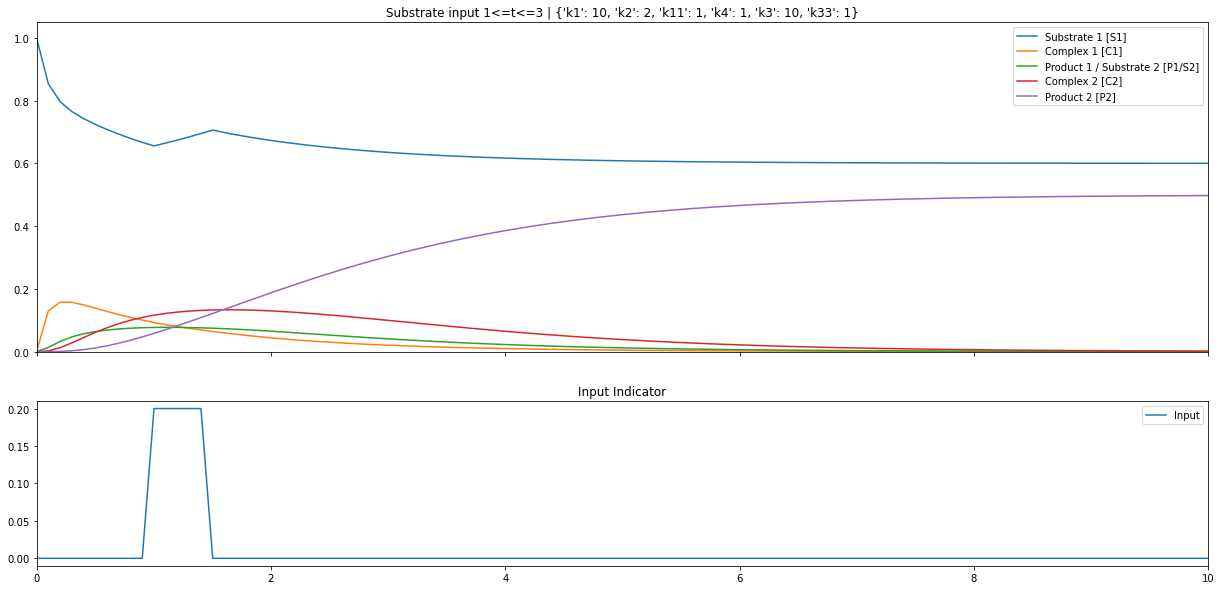

In [89]:
# Reaction Cycle Initializations###############################################
t_max = 50
t_values = np.linspace(0, t_max, t_max * 10)
# Initial values
init_dict = {"S1": 1, "C1": 0, "E1": 0.25, "P1": 0, "C2": 0, "E2": 0.5, "P2": 0}
initial_values = [v for v in init_dict.values()]
# Rate constants
rate_constant_dict = {"k1": 10, "k2": 2, "k11": 1, "k4": 1, "k3": 10, "k33": 1}
rate_constants = [[i  for i in rate_constant_dict.values()]]

solution = solve_ivp(
    fun=positive_feedback,
    t_span=[0, t_max],
    y0=initial_values,
    t_eval=t_values,
    args=rate_constants,
    rtol = 1e-11, 
    atol = 1e-13,
    method = 'BDF', 
    max_step = 0.5
)

s1_input = np.zeros(len(t_values))
s1_input[np.where((t_values >= 1) & (t_values <= 1.5))] = 0.2
# s1_input[np.where((t_values >= 10) & (t_values <= 15))] = 0.5

fig, ax = plt.subplots(
    2, 1, figsize=(21, 10), gridspec_kw={"height_ratios": [2, 1]}, sharex=True
)
# fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax[0].set_title(f"Substrate input 1<=t<=3 | {rate_constant_dict}")
ax[0].plot(solution.t, solution.y[0], label="Substrate 1 [S1]")
ax[0].plot(solution.t, solution.y[1], label="Complex 1 [C1]")
# ax[0].plot(solution.t, solution.y[2], label="Enzyme 1 [E1]")
ax[0].plot(solution.t, solution.y[3], label="Product 1 / Substrate 2 [P1/S2]")
ax[0].plot(solution.t, solution.y[4], label="Complex 2 [C2]")
# ax[0].plot(solution.t, solution.y[5], label="Enzyme 2 [E2]")
ax[0].plot(solution.t, solution.y[6], label="Product 2 [P2]")
ax[0].set_xlim(left=0, right=10)
ax[0].set_ylim(bottom=0)
ax[0].legend()
ax[1].set_title("Input Indicator")
ax[1].plot(t_values, s1_input, label="Input")
plt.legend()
plt.show()